In [6]:
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import pairwise_distances
import matplotlib.pyplot as plt

# Import data

In [2]:
data_filepath: Path = Path('data.csv')
assert(data_filepath.exists())

data = pd.read_csv(str(data_filepath), header=0, index_col='Seq')
dtype_spec = {column: np.int64 for column in data.columns[1:]} # Build a type specification
print(dtype_spec)
data.astype(dtype_spec) # Apply spec to data
data

{'Sensor 2': <class 'numpy.int64'>, 'Sensor 3': <class 'numpy.int64'>, 'Sensor 4': <class 'numpy.int64'>, 'Sensor 5': <class 'numpy.int64'>, 'Sensor 6': <class 'numpy.int64'>, 'Sensor 7': <class 'numpy.int64'>, 'Sensor 8': <class 'numpy.int64'>, 'Sensor 9': <class 'numpy.int64'>, 'Sensor 10': <class 'numpy.int64'>, 'Sensor 11': <class 'numpy.int64'>, 'Sensor 12': <class 'numpy.int64'>, 'Sensor 13': <class 'numpy.int64'>, 'Sensor 14': <class 'numpy.int64'>, 'Sensor 15': <class 'numpy.int64'>, 'Sensor 16': <class 'numpy.int64'>, 'Sensor 17': <class 'numpy.int64'>}


,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,Sensor 11,Sensor 12,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17
Seq,,,,,,,,,,,,,,,,,
V1,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
V2,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
V3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139
V4,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
V5,509,63,271,1613,118,55,207,139,1058,628,193,830,465,247,376,1734,167
V6,469,63,268,1490,101,63,223,152,1098,706,247,699,467,209,363,1597,164
V7,336,62,219,1323,98,59,172,130,990,646,226,615,437,176,322,1235,138
V8,492,58,286,1493,118,59,156,101,878,320,99,777,313,204,348,1684,170


# Normalize

In [5]:
data[:] = MinMaxScaler().fit_transform(data[:]) # Normalize each column (sensor). Otherwise the sensors with bigger ranges (like Sensor 4) will dominate the comparison.
data

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,Sensor 11,Sensor 12,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17
Seq,,,,,,,,,,,,,,,,,
V1,0.641711,0.384615,0.388060,0.513793,0.750000,0.565217,0.468354,0.805970,0.924406,0.561010,0.927711,0.405738,0.680934,0.309859,0.703704,0.278557,0.486486
V2,0.909091,1.000000,0.119403,0.893103,0.711538,1.000000,1.000000,1.000000,1.000000,0.776999,1.000000,0.889344,1.000000,0.380282,0.796296,0.042084,1.000000
V3,0.000000,0.000000,0.716418,0.589655,0.000000,0.000000,0.670886,0.000000,0.000000,1.000000,0.265060,0.000000,0.163424,0.154930,0.222222,0.543086,0.027027
V4,0.863636,0.230769,0.343284,0.479310,0.711538,0.913043,0.354430,0.432836,0.611231,0.345021,0.433735,0.672131,0.408560,0.619718,0.277778,0.675351,0.243243
V5,1.000000,0.615385,0.776119,1.000000,1.000000,0.608696,0.645570,0.686567,0.829374,0.431978,0.566265,1.000000,0.591440,1.000000,1.000000,1.000000,0.783784
V6,0.893048,0.615385,0.731343,0.575862,0.673077,0.956522,0.848101,0.880597,0.915767,0.541374,0.891566,0.463115,0.599222,0.464789,0.759259,0.725451,0.702703
V7,0.537433,0.576923,0.000000,0.000000,0.615385,0.782609,0.202532,0.552239,0.682505,0.457223,0.765060,0.118852,0.482490,0.000000,0.000000,0.000000,0.000000
V8,0.954545,0.423077,1.000000,0.586207,1.000000,0.782609,0.000000,0.119403,0.440605,0.000000,0.000000,0.782787,0.000000,0.394366,0.481481,0.899800,0.864865


# Measure distances

(8, 8)


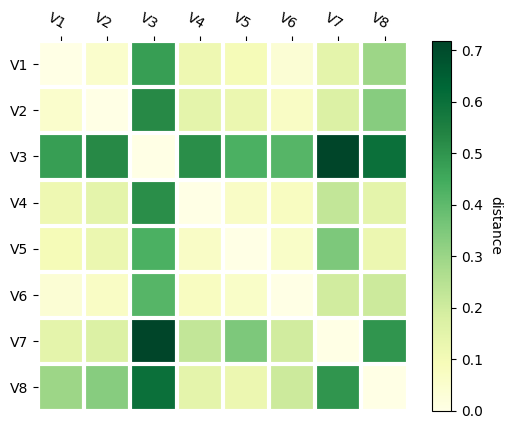

In [24]:
distances = pairwise_distances(data, metric='cosine')
print(distances.shape)  # MUST be (8, 8)

from heatmap import heatmap
labels = [f"V{i}" for i in range(1, 9)]
fig, ax = plt.subplots()
im, cbar = heatmap(
    distances, labels, labels, ax=ax, cmap="YlGn", cbarlabel="distance"
)

Using the fact that we have very few samples (machines=8), we just measure the distance between each one. Using the cosine metric is clear that the machine V3 is significally different from the rest. Other metrics (like euclidean, l1, l2) also give us that conclusion.